# **GS02.2025 - SOLUCOES EM ENERGIAS RENOVAVEIS E SUSTENTAVEIS**

Integrantes:

Guilherme Spranger dos Santos -> RM: 564059

Samuel de Souza Jorge -> RM: 558966

1CCR

## Importação das bibliotecas e carregamento do Dataset

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('dados.csv', sep=';')
df.head()

,Dia,Consumo_Luz_kWh,Consumo_ArCondicionado_kWh,Consumo_Computadores_kWh,Consumo_EquipamentosAuxiliares_kWh,Consumo_Total_kWh
0,2025-10-01,4.95,9.04,6.22,2.15,22.36
1,2025-10-02,4.76,8.29,6.20,2.14,21.39
2,2025-10-03,4.99,7.88,6.70,1.98,21.55
3,2025-10-04,5.26,8.63,6.84,2.24,22.97
4,2025-10-05,4.73,7.81,6.48,2.24,21.26


# Cálculo do gasto diário de cada equipamento (em %) + Gráfico de comparacão

Dia -> 1  | Luz: 22.14% | Ar: 40.43% | Computadores: 27.82% | Eq. Aux: 9.62%
Dia -> 2  | Luz: 22.25% | Ar: 38.76% | Computadores: 28.99% | Eq. Aux: 10.00%
Dia -> 3  | Luz: 23.16% | Ar: 36.57% | Computadores: 31.09% | Eq. Aux: 9.19%
Dia -> 4  | Luz: 22.90% | Ar: 37.57% | Computadores: 29.78% | Eq. Aux: 9.75%
Dia -> 5  | Luz: 22.25% | Ar: 36.74% | Computadores: 30.48% | Eq. Aux: 10.54%
Dia -> 6  | Luz: 21.44% | Ar: 37.99% | Computadores: 30.60% | Eq. Aux: 9.97%
Dia -> 7  | Luz: 24.47% | Ar: 34.91% | Computadores: 30.59% | Eq. Aux: 10.03%
Dia -> 8  | Luz: 23.81% | Ar: 36.77% | Computadores: 30.00% | Eq. Aux: 9.42%
Dia -> 9  | Luz: 21.41% | Ar: 38.49% | Computadores: 30.27% | Eq. Aux: 9.83%
Dia -> 10 | Luz: 21.96% | Ar: 38.07% | Computadores: 30.46% | Eq. Aux: 9.52%
Dia -> 11 | Luz: 21.57% | Ar: 38.75% | Computadores: 30.05% | Eq. Aux: 9.63%
Dia -> 12 | Luz: 21.20% | Ar: 37.53% | Computadores: 31.35% | Eq. Aux: 9.92%
Dia -> 13 | Luz: 23.02% | Ar: 38.66% | Computadores: 27.65% | Eq. Aux: 10

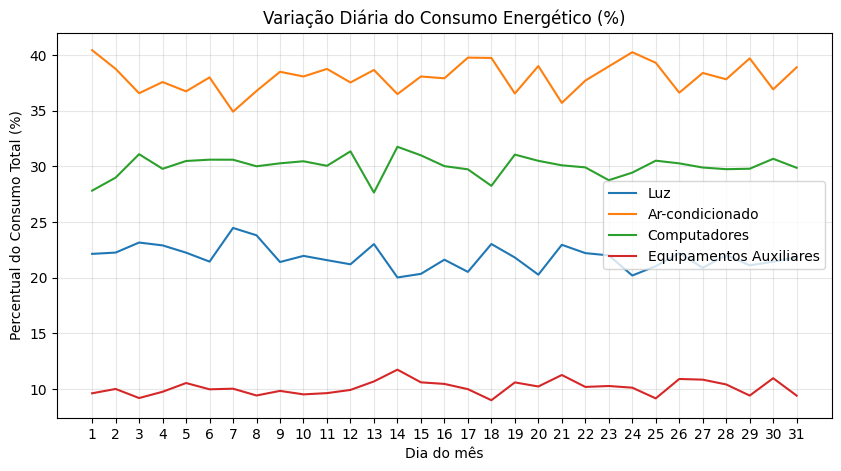

In [11]:
gasto_luz = []
gasto_ar = []
gasto_computadores = []
gasto_eq_aux = []

for i in range(len(df)):
  total = df.loc[i, 'Consumo_Total_kWh']
  luz = (df.loc[i, 'Consumo_Luz_kWh'] / total) * 100
  ar = (df.loc[i, 'Consumo_ArCondicionado_kWh'] / total) * 100
  computador = (df.loc[i, 'Consumo_Computadores_kWh'] / total) * 100
  eqaux = (df.loc[i, 'Consumo_EquipamentosAuxiliares_kWh'] / total) * 100

  gasto_luz.append(luz)
  gasto_ar.append(ar)
  gasto_computadores.append(computador)
  gasto_eq_aux.append(eqaux)

  print(f"Dia -> {i+1:<2} | Luz: {luz:.2f}% | Ar: {ar:.2f}% | Computadores: {computador:.2f}% | Eq. Aux: {eqaux:.2f}%")

print("")
plt.figure(figsize=(10,5))
plt.plot(range(1, len(df)+1), gasto_luz, label="Luz")
plt.plot(range(1, len(df)+1), gasto_ar, label="Ar-condicionado")
plt.plot(range(1, len(df)+1), gasto_computadores, label="Computadores")
plt.plot(range(1, len(df)+1), gasto_eq_aux, label="Equipamentos Auxiliares")
plt.title("Variação Diária do Consumo Energético (%)")
plt.xlabel("Dia do mês")
plt.ylabel("Percentual do Consumo Total (%)")
plt.legend()
plt.xticks(range(1, len(df)+1))
plt.grid(alpha=0.3)
plt.show()

## Cálculo do consumo mensal de cada equipamento + gráficos para comparação

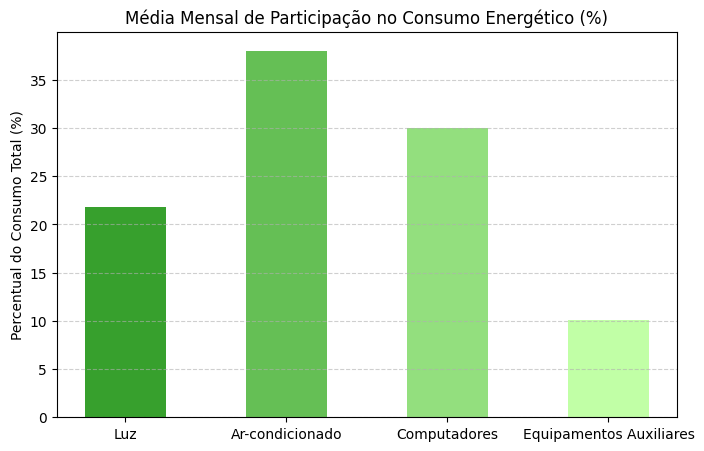

In [12]:
media_luz = sum(gasto_luz) / len(gasto_luz)
media_ar = sum(gasto_ar) / len(gasto_ar)
media_pc = sum(gasto_computadores) / len(gasto_computadores)
media_aux = sum(gasto_eq_aux) / len(gasto_eq_aux)

categorias = ["Luz", "Ar-condicionado", "Computadores", "Equipamentos Auxiliares"]
valores = [media_luz, media_ar, media_pc, media_aux]

plt.figure(figsize=(8,5))
plt.bar(categorias, valores, color=["#37a02d", "#65bf55", "#93df7e", "#c1ffa6"], width=0.5)
plt.title("Média Mensal de Participação no Consumo Energético (%)")
plt.ylabel("Percentual do Consumo Total (%)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

## Análise dos dados + recomendações

In [13]:
if media_luz > 25:
  print(f"A média de consumo de luz no mês foi de {media_luz:.2f}!\nRecomendamos a instalação de sensores de presença nos sistemas de iluminação para uma melhora na eficiência do gasto energético.")
else:
  print(f"A média de consumo de luz no mês foi de {media_luz:.2f}!\nNão são necessárias modificações no sistema de iluminação, continue assim!")

A média de consumo de luz no mês foi de 21.84!
Não são necessárias modificações no sistema de iluminação, continue assim!


In [14]:
if media_ar > 40:
  print(f"A média de consumo do ar condicionado no mês foi de {media_ar:.2f}!\nRecomendamos o uso de ajuste automático nos equipamentos, conforme a temperatura registrada no exterior.")
else:
  print(f"A média de consumo do ar condicionado no mês foi de {media_ar:.2f}!\nEstá fazendo um ótimo uso!")

A média de consumo do ar condicionado no mês foi de 38.03!
Está fazendo um ótimo uso!


In [15]:
if media_pc > 20:
  print(f"A média de consumo dos computadores no mês foi de {media_pc:.2f}!\nRecomendamos que configure as máquinas para utilizarem o 'Modo Economia de Energia', além de técnicas para o desligamento automático (como scripts ou tomadas inteligentes) das máquinas no período em que não estão sendo usadas.")
else:
  print(f"A média de consumo dos computadores no mês foi de {media_pc:.2f}!\nNão há nada para melhorar, muito bem!")

A média de consumo dos computadores no mês foi de 30.01!
Recomendamos que configure as máquinas para utilizarem o 'Modo Economia de Energia', além de técnicas para o desligamento automático (como scripts ou tomadas inteligentes) das máquinas no período em que não estão sendo usadas.


In [16]:
if media_aux > 20:
  print(f"A média de consumo dos equipamentos auxiliares no mês foi de {media_aux:.2f}!\nRecomendamos o uso de tomadas inteligentes para desligar os equipamentos fora do horário de uso, além de revisões nos equipamentos para possíveis substituições.")
else:
  print(f"A média de consumo dos equipamentos auxiliares no mês foi de {media_aux:.2f}!\nO seu gasto energético está dentro do necessário!")

A média de consumo dos equipamentos auxiliares no mês foi de 10.12!
O seu gasto energético está dentro do necessário!
